In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay
import catboost as cb
from catboost import Pool
from catboost import CatBoostRegressor

In [2]:
df = pd.read_csv("TFTP_mini.csv")

In [3]:
df.head(10)

,Flow ID,SourceIP,Destination IP,Destination Posrt,Flow Duration,Total Length of Bwd Packets,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Label
0,0,0,0,0,0,0,0,0,0,0,0
1,35872,0,0,0,2,0,0,0,0,0,0
2,24,0,0,2,2,0,0,0,0,0,0
3,6442,0,0,2,2,0,0,0,0,0,0
4,57,0,0,7,2,0,0,0,0,0,0
5,13930,0,0,8,2,0,0,0,0,0,0
6,26938,0,0,9,2,0,0,0,0,0,0
7,8956,0,0,12,2,0,0,0,0,0,0
8,94,0,0,13,2,0,0,0,0,0,0
9,130,0,0,17,2,0,0,0,0,0,0


<AxesSubplot:>

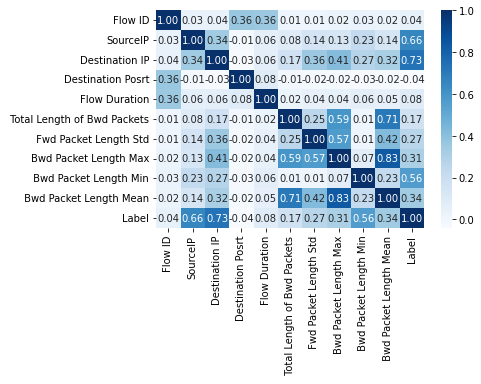

In [4]:
plt.rcParams['figure.figsize'] = (30,10)
sns.heatmap(data=df.corr(),annot=True,fmt='.2f',cmap='Blues')

In [5]:
X = df.drop('Label',axis=1)
X.head(5)

,Flow ID,SourceIP,Destination IP,Destination Posrt,Flow Duration,Total Length of Bwd Packets,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean
0,0,0,0,0,0,0,0,0,0,0
1,35872,0,0,0,2,0,0,0,0,0
2,24,0,0,2,2,0,0,0,0,0
3,6442,0,0,2,2,0,0,0,0,0
4,57,0,0,7,2,0,0,0,0,0


In [6]:
y = df['Label']
y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: Label, dtype: int64

In [7]:
X.shape

(201079, 10)

In [8]:
y.shape

(201079,)

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0, test_size = 0.2)

In [10]:
X_test.shape

(40216, 10)

In [11]:
X_train.shape

(160863, 10)

In [12]:
knn_1 = KNeighborsClassifier(n_neighbors=5)

In [13]:
scale = StandardScaler()

In [14]:
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.fit_transform(X_test)

In [15]:
X_train_scaled

array([[-0.26402334, -0.02562227, -0.02849001, ..., -0.01465783,
        -0.02083325, -0.01479166],
       [ 1.41854068, -0.02562227, -0.02849001, ..., -0.01465783,
        -0.02083325, -0.01479166],
       [-1.65808942, -0.02562227, -0.02849001, ..., -0.01465783,
        -0.02083325, -0.01479166],
       ...,
       [ 1.26076342, -0.02562227, -0.02849001, ..., -0.01465783,
        -0.02083325, -0.01479166],
       [-1.17679568, -0.02562227, -0.02849001, ..., -0.01465783,
        -0.02083325, -0.01479166],
       [ 1.70876487, -0.02562227, -0.02849001, ..., -0.01465783,
        -0.02083325, -0.01479166]])

In [16]:
X_test_scaled

array([[ 1.37858202, -0.02473759, -0.02474241, ..., -0.01545027,
        -0.02087377, -0.02038687],
       [ 1.35456548, -0.02473759, -0.02474241, ..., -0.01545027,
        -0.02087377, -0.02038687],
       [ 1.2372512 , -0.02473759, -0.02474241, ..., -0.01545027,
        -0.02087377, -0.02038687],
       ...,
       [ 1.10822842, -0.02473759, -0.02474241, ..., -0.01545027,
        -0.02087377, -0.02038687],
       [ 0.60070709, -0.02473759, -0.02474241, ..., -0.01545027,
        -0.02087377, -0.02038687],
       [-0.52752367, -0.02473759, -0.02474241, ..., -0.01545027,
        -0.02087377, -0.02038687]])

In [17]:
knn_v = knn_1.fit(X_train_scaled,y_train)

In [18]:
y_pred = knn_1.predict(X_test_scaled)

In [19]:
y_test

180170    0
178806    0
172080    0
141177    0
81976     0
         ..
185615    0
73874     0
164661    0
135365    0
69885     0
Name: Label, Length: 40216, dtype: int64

In [20]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [21]:
val = accuracy_score(y_test,y_pred)*100
val = round(val,4)
val

99.9925

In [22]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[40170,     2],
       [    1,    43]], dtype=int64)

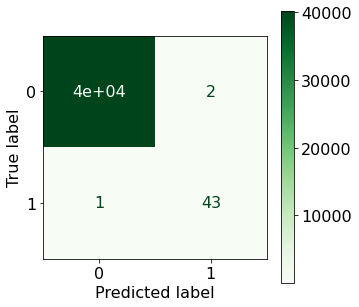

In [23]:
plt.rcParams['figure.figsize'] = (5,5)
plt.rcParams.update({'font.size': 16})
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=knn_1.classes_,)
disp.plot(cmap='Greens')

In [24]:
knn_1.score(X_test_scaled,y_test)

0.9999254028247464

In [25]:
knn_1.score(X_train_scaled,y_train)

0.9999689176504231

In [26]:
#Mean Abs Error
print(f"Mean Abs Error = {mean_absolute_error(y_test,y_pred)}")
#Mean Sq Error
print(f"Mean Sq Error = {mean_squared_error(y_test,y_pred)}")
#Mean Sq Error
print(f"Root Mean Sq Error = {np.sqrt(mean_squared_error(y_test,y_pred))}")

Mean Abs Error = 7.459717525363039e-05
Mean Sq Error = 7.459717525363039e-05
Root Mean Sq Error = 0.008636965627674478


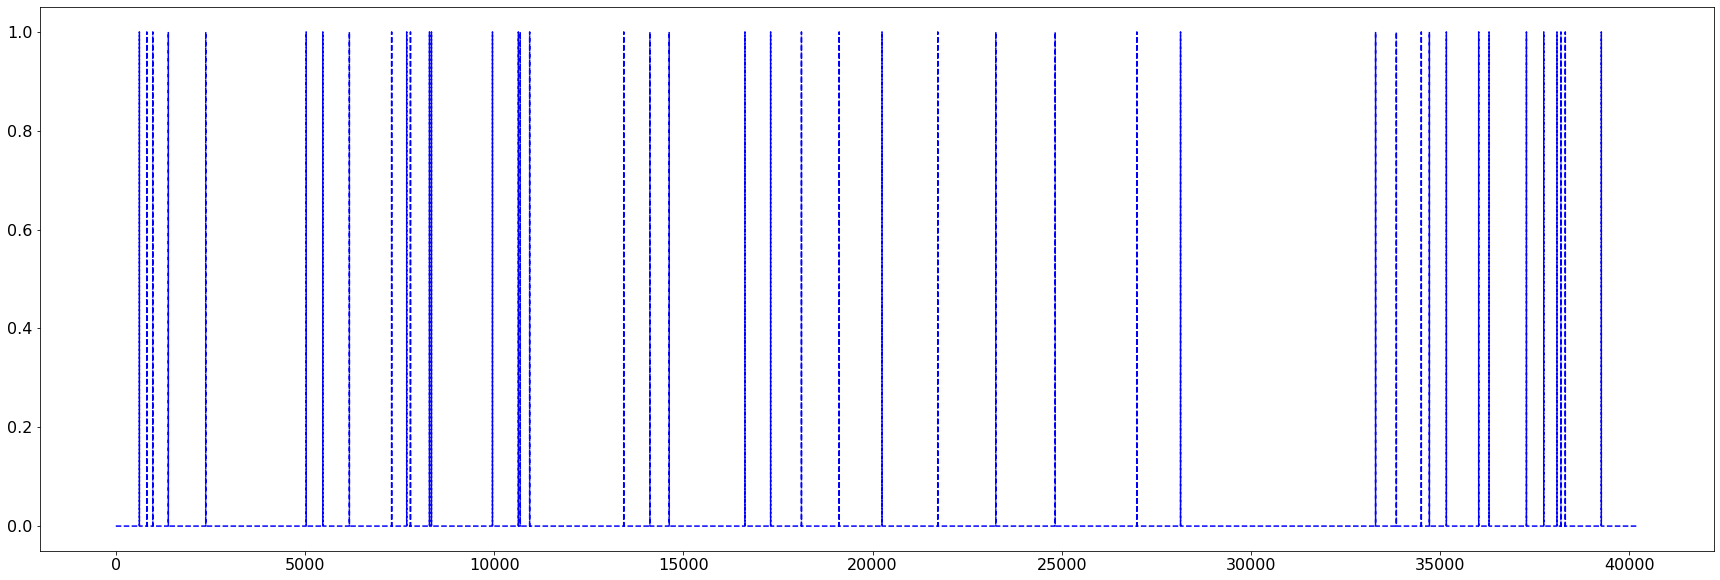

In [27]:
plt.rcParams['figure.figsize'] = (30,10)
x_ax = range(len(X_test))
plt.plot(x_ax, y_test, label = 'Observed', color = 'blue', linestyle = '--')

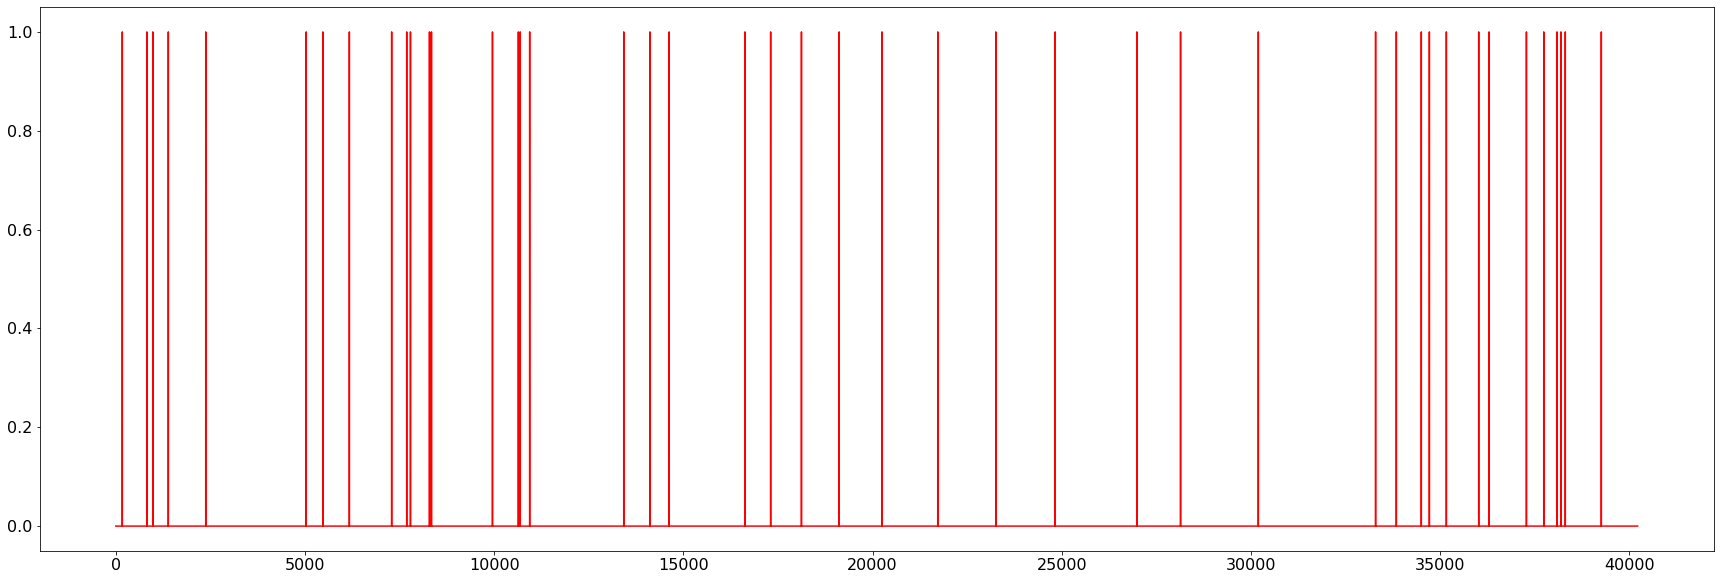

In [28]:
plt.rcParams['figure.figsize'] = (30,10)
x_ax = range(len(X_test))
plt.plot(x_ax, y_pred, label = 'Predicted', color = 'red', linestyle = '-')

In [29]:
knn_2 = KNeighborsClassifier(n_neighbors=5)

In [30]:
scores = cross_val_score(knn_2, X, y,cv = 10, scoring = 'accuracy')

In [31]:
scores = [ 100* round(elem, 4) for elem in scores ]
print(scores)

[99.87, 99.67, 99.88, 98.7, 99.97, 99.0, 99.96000000000001, 99.11, 99.36, 52.059999999999995]


In [32]:
est_score = np.array(scores).mean()
print(est_score)

94.758


In [33]:
k_range = range(1, 30) #KNN (k) values
k_scores = []

for k in k_range:
    knn_3 = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_3, X, y,cv = 5, scoring = 'accuracy')
    k_scores.append(scores.mean())

In [34]:
k_scores = [ 100* round(elem, 4) for elem in k_scores ]
print(k_scores)

[82.08, 86.64, 86.38, 87.91, 87.86, 89.2, 89.14999999999999, 90.01, 89.97, 90.5, 90.47, 91.12, 91.09, 91.60000000000001, 91.60000000000001, 91.91, 91.9, 92.13, 92.13, 92.41, 92.41, 92.60000000000001, 92.58999999999999, 92.73, 92.72, 92.9, 92.89, 93.01, 93.0]


<AxesSubplot:>

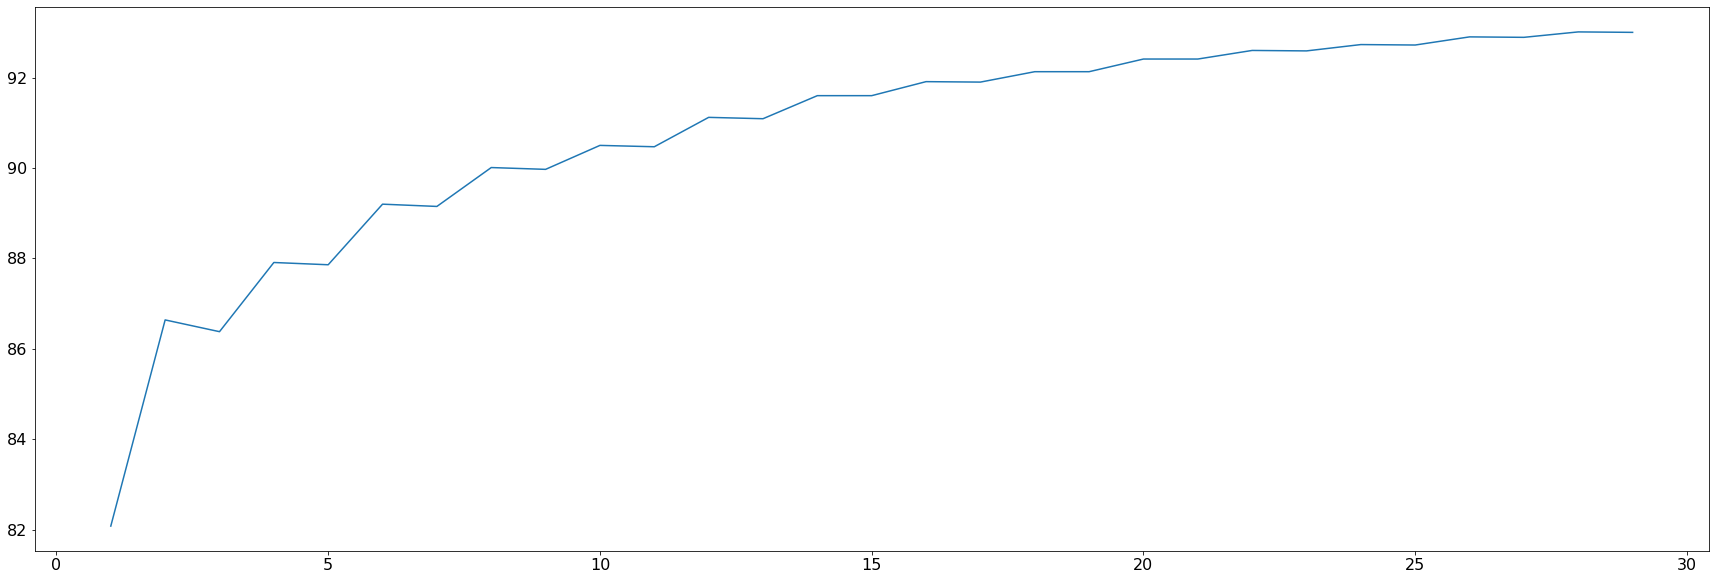

In [35]:
sns.lineplot(x=k_range,y=k_scores)

In [36]:
k_range = range(1, 30) #KNN (k) values
k_err_scores = []

for k in k_range:
    knn_4 = KNeighborsClassifier(n_neighbors=k)
    knn_4.fit(X_train_scaled,y_train)
    y_pred = knn_4.predict(X_test_scaled)
    k_err_scores.append(mean_squared_error(y_test,y_pred))

<AxesSubplot:>

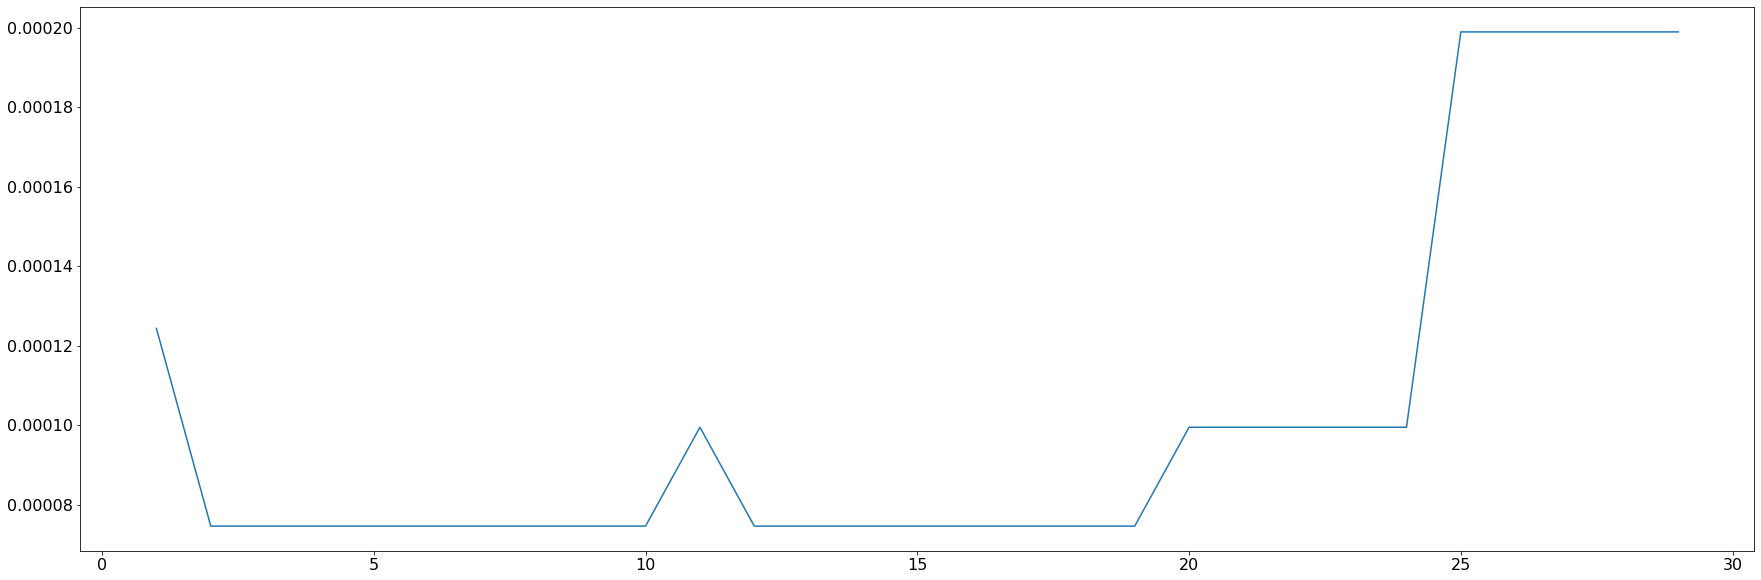

In [37]:
sns.lineplot(x=k_range,y=k_err_scores)

In [38]:
train_dataset = cb.Pool(X_train_scaled, y_train) 
test_dataset = cb.Pool(X_test_scaled, y_test)
model = cb.CatBoostRegressor(loss_function='RMSE')

In [39]:
train_data = Pool(data=X_train_scaled,
                  label=y_train)
#Creating pool object for test dataset
test_data = Pool(data=X_test_scaled,
                  label=y_test)

In [41]:
cat_model = CatBoostRegressor(loss_function='RMSE')
# Fit model 
cat_model.fit( X_train_scaled, y_train,
               eval_set=(X_test_scaled, y_test),
               plot=True
              )

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.11306
0:	learn: 0.0338473	test: 0.0296074	best: 0.0296074 (0)	total: 16.3ms	remaining: 16.3s
1:	learn: 0.0303351	test: 0.0265925	best: 0.0265925 (1)	total: 29.9ms	remaining: 14.9s
2:	learn: 0.0271727	test: 0.0249274	best: 0.0249274 (2)	total: 43ms	remaining: 14.3s
3:	learn: 0.0243306	test: 0.0228148	best: 0.0228148 (3)	total: 57.6ms	remaining: 14.3s
4:	learn: 0.0217416	test: 0.0208071	best: 0.0208071 (4)	total: 67.6ms	remaining: 13.5s
5:	learn: 0.0195059	test: 0.0192476	best: 0.0192476 (5)	total: 80.1ms	remaining: 13.3s
6:	learn: 0.0175121	test: 0.0178651	best: 0.0178651 (6)	total: 93.1ms	remaining: 13.2s
7:	learn: 0.0157737	test: 0.0167974	best: 0.0167974 (7)	total: 105ms	remaining: 13s
8:	learn: 0.0141600	test: 0.0159637	best: 0.0159637 (8)	total: 118ms	remaining: 13s
9:	learn: 0.0127458	test: 0.0152182	best: 0.0152182 (9)	total: 130ms	remaining: 12.8s
10:	learn: 0.0114774	test: 0.0146560	best: 0.0146560 (10)	total: 143ms	remaining: 12.8s
11:	learn: 0.0103608	t

107:	learn: 0.0003675	test: 0.0133962	best: 0.0130601 (19)	total: 1.44s	remaining: 11.9s
108:	learn: 0.0003615	test: 0.0133972	best: 0.0130601 (19)	total: 1.45s	remaining: 11.9s
109:	learn: 0.0003561	test: 0.0133982	best: 0.0130601 (19)	total: 1.47s	remaining: 11.9s
110:	learn: 0.0003551	test: 0.0133976	best: 0.0130601 (19)	total: 1.48s	remaining: 11.9s
111:	learn: 0.0003487	test: 0.0133974	best: 0.0130601 (19)	total: 1.5s	remaining: 11.9s
112:	learn: 0.0003429	test: 0.0133914	best: 0.0130601 (19)	total: 1.51s	remaining: 11.9s
113:	learn: 0.0003359	test: 0.0133876	best: 0.0130601 (19)	total: 1.52s	remaining: 11.8s
114:	learn: 0.0003291	test: 0.0133863	best: 0.0130601 (19)	total: 1.54s	remaining: 11.8s
115:	learn: 0.0003270	test: 0.0133862	best: 0.0130601 (19)	total: 1.55s	remaining: 11.8s
116:	learn: 0.0003212	test: 0.0133852	best: 0.0130601 (19)	total: 1.56s	remaining: 11.8s
117:	learn: 0.0003159	test: 0.0133832	best: 0.0130601 (19)	total: 1.58s	remaining: 11.8s
118:	learn: 0.0003126	

201:	learn: 0.0001527	test: 0.0133486	best: 0.0130601 (19)	total: 2.71s	remaining: 10.7s
202:	learn: 0.0001524	test: 0.0133486	best: 0.0130601 (19)	total: 2.72s	remaining: 10.7s
203:	learn: 0.0001523	test: 0.0133486	best: 0.0130601 (19)	total: 2.73s	remaining: 10.7s
204:	learn: 0.0001509	test: 0.0133489	best: 0.0130601 (19)	total: 2.75s	remaining: 10.7s
205:	learn: 0.0001508	test: 0.0133489	best: 0.0130601 (19)	total: 2.76s	remaining: 10.6s
206:	learn: 0.0001494	test: 0.0133491	best: 0.0130601 (19)	total: 2.77s	remaining: 10.6s
207:	learn: 0.0001493	test: 0.0133491	best: 0.0130601 (19)	total: 2.79s	remaining: 10.6s
208:	learn: 0.0001489	test: 0.0133490	best: 0.0130601 (19)	total: 2.8s	remaining: 10.6s
209:	learn: 0.0001476	test: 0.0133492	best: 0.0130601 (19)	total: 2.82s	remaining: 10.6s
210:	learn: 0.0001467	test: 0.0133490	best: 0.0130601 (19)	total: 2.83s	remaining: 10.6s
211:	learn: 0.0001447	test: 0.0133480	best: 0.0130601 (19)	total: 2.85s	remaining: 10.6s
212:	learn: 0.0001427	

306:	learn: 0.0000866	test: 0.0133457	best: 0.0130601 (19)	total: 4.2s	remaining: 9.47s
307:	learn: 0.0000861	test: 0.0133456	best: 0.0130601 (19)	total: 4.21s	remaining: 9.46s
308:	learn: 0.0000855	test: 0.0133456	best: 0.0130601 (19)	total: 4.22s	remaining: 9.45s
309:	learn: 0.0000852	test: 0.0133456	best: 0.0130601 (19)	total: 4.24s	remaining: 9.44s
310:	learn: 0.0000852	test: 0.0133456	best: 0.0130601 (19)	total: 4.25s	remaining: 9.42s
311:	learn: 0.0000851	test: 0.0133456	best: 0.0130601 (19)	total: 4.27s	remaining: 9.41s
312:	learn: 0.0000845	test: 0.0133460	best: 0.0130601 (19)	total: 4.28s	remaining: 9.4s
313:	learn: 0.0000845	test: 0.0133460	best: 0.0130601 (19)	total: 4.29s	remaining: 9.38s
314:	learn: 0.0000842	test: 0.0133460	best: 0.0130601 (19)	total: 4.31s	remaining: 9.37s
315:	learn: 0.0000839	test: 0.0133460	best: 0.0130601 (19)	total: 4.32s	remaining: 9.36s
316:	learn: 0.0000836	test: 0.0133462	best: 0.0130601 (19)	total: 4.34s	remaining: 9.34s
317:	learn: 0.0000836	t

412:	learn: 0.0000626	test: 0.0133509	best: 0.0130601 (19)	total: 5.7s	remaining: 8.1s
413:	learn: 0.0000626	test: 0.0133509	best: 0.0130601 (19)	total: 5.71s	remaining: 8.08s
414:	learn: 0.0000625	test: 0.0133509	best: 0.0130601 (19)	total: 5.72s	remaining: 8.07s
415:	learn: 0.0000624	test: 0.0133509	best: 0.0130601 (19)	total: 5.74s	remaining: 8.05s
416:	learn: 0.0000624	test: 0.0133508	best: 0.0130601 (19)	total: 5.75s	remaining: 8.04s
417:	learn: 0.0000622	test: 0.0133507	best: 0.0130601 (19)	total: 5.76s	remaining: 8.02s
418:	learn: 0.0000621	test: 0.0133507	best: 0.0130601 (19)	total: 5.77s	remaining: 8.01s
419:	learn: 0.0000619	test: 0.0133504	best: 0.0130601 (19)	total: 5.79s	remaining: 7.99s
420:	learn: 0.0000618	test: 0.0133504	best: 0.0130601 (19)	total: 5.8s	remaining: 7.98s
421:	learn: 0.0000618	test: 0.0133504	best: 0.0130601 (19)	total: 5.81s	remaining: 7.96s
422:	learn: 0.0000615	test: 0.0133504	best: 0.0130601 (19)	total: 5.83s	remaining: 7.95s
423:	learn: 0.0000613	te

515:	learn: 0.0000457	test: 0.0133466	best: 0.0130601 (19)	total: 7.21s	remaining: 6.77s
516:	learn: 0.0000456	test: 0.0133466	best: 0.0130601 (19)	total: 7.23s	remaining: 6.75s
517:	learn: 0.0000451	test: 0.0133466	best: 0.0130601 (19)	total: 7.24s	remaining: 6.74s
518:	learn: 0.0000450	test: 0.0133466	best: 0.0130601 (19)	total: 7.26s	remaining: 6.73s
519:	learn: 0.0000450	test: 0.0133466	best: 0.0130601 (19)	total: 7.27s	remaining: 6.71s
520:	learn: 0.0000449	test: 0.0133465	best: 0.0130601 (19)	total: 7.29s	remaining: 6.7s
521:	learn: 0.0000448	test: 0.0133465	best: 0.0130601 (19)	total: 7.3s	remaining: 6.68s
522:	learn: 0.0000447	test: 0.0133465	best: 0.0130601 (19)	total: 7.31s	remaining: 6.67s
523:	learn: 0.0000446	test: 0.0133465	best: 0.0130601 (19)	total: 7.33s	remaining: 6.66s
524:	learn: 0.0000445	test: 0.0133466	best: 0.0130601 (19)	total: 7.34s	remaining: 6.64s
525:	learn: 0.0000445	test: 0.0133465	best: 0.0130601 (19)	total: 7.35s	remaining: 6.63s
526:	learn: 0.0000444	t

620:	learn: 0.0000348	test: 0.0133393	best: 0.0130601 (19)	total: 8.69s	remaining: 5.31s
621:	learn: 0.0000345	test: 0.0133392	best: 0.0130601 (19)	total: 8.71s	remaining: 5.29s
622:	learn: 0.0000344	test: 0.0133392	best: 0.0130601 (19)	total: 8.72s	remaining: 5.28s
623:	learn: 0.0000342	test: 0.0133392	best: 0.0130601 (19)	total: 8.73s	remaining: 5.26s
624:	learn: 0.0000341	test: 0.0133392	best: 0.0130601 (19)	total: 8.75s	remaining: 5.25s
625:	learn: 0.0000341	test: 0.0133392	best: 0.0130601 (19)	total: 8.76s	remaining: 5.23s
626:	learn: 0.0000340	test: 0.0133392	best: 0.0130601 (19)	total: 8.77s	remaining: 5.22s
627:	learn: 0.0000340	test: 0.0133392	best: 0.0130601 (19)	total: 8.79s	remaining: 5.2s
628:	learn: 0.0000339	test: 0.0133392	best: 0.0130601 (19)	total: 8.8s	remaining: 5.19s
629:	learn: 0.0000339	test: 0.0133392	best: 0.0130601 (19)	total: 8.81s	remaining: 5.17s
630:	learn: 0.0000339	test: 0.0133392	best: 0.0130601 (19)	total: 8.82s	remaining: 5.16s
631:	learn: 0.0000339	t

716:	learn: 0.0000277	test: 0.0133380	best: 0.0130601 (19)	total: 9.98s	remaining: 3.94s
717:	learn: 0.0000276	test: 0.0133380	best: 0.0130601 (19)	total: 9.99s	remaining: 3.92s
718:	learn: 0.0000276	test: 0.0133380	best: 0.0130601 (19)	total: 10s	remaining: 3.91s
719:	learn: 0.0000276	test: 0.0133380	best: 0.0130601 (19)	total: 10s	remaining: 3.9s
720:	learn: 0.0000275	test: 0.0133380	best: 0.0130601 (19)	total: 10s	remaining: 3.88s
721:	learn: 0.0000273	test: 0.0133379	best: 0.0130601 (19)	total: 10.1s	remaining: 3.87s
722:	learn: 0.0000273	test: 0.0133379	best: 0.0130601 (19)	total: 10.1s	remaining: 3.86s
723:	learn: 0.0000273	test: 0.0133379	best: 0.0130601 (19)	total: 10.1s	remaining: 3.84s
724:	learn: 0.0000272	test: 0.0133379	best: 0.0130601 (19)	total: 10.1s	remaining: 3.83s
725:	learn: 0.0000272	test: 0.0133379	best: 0.0130601 (19)	total: 10.1s	remaining: 3.82s
726:	learn: 0.0000271	test: 0.0133379	best: 0.0130601 (19)	total: 10.1s	remaining: 3.8s
727:	learn: 0.0000271	test: 0

822:	learn: 0.0000215	test: 0.0133367	best: 0.0130601 (19)	total: 11.6s	remaining: 2.49s
823:	learn: 0.0000215	test: 0.0133367	best: 0.0130601 (19)	total: 11.6s	remaining: 2.47s
824:	learn: 0.0000215	test: 0.0133367	best: 0.0130601 (19)	total: 11.6s	remaining: 2.46s
825:	learn: 0.0000215	test: 0.0133367	best: 0.0130601 (19)	total: 11.6s	remaining: 2.44s
826:	learn: 0.0000214	test: 0.0133367	best: 0.0130601 (19)	total: 11.6s	remaining: 2.43s
827:	learn: 0.0000212	test: 0.0133367	best: 0.0130601 (19)	total: 11.6s	remaining: 2.42s
828:	learn: 0.0000211	test: 0.0133367	best: 0.0130601 (19)	total: 11.6s	remaining: 2.4s
829:	learn: 0.0000211	test: 0.0133367	best: 0.0130601 (19)	total: 11.7s	remaining: 2.39s
830:	learn: 0.0000207	test: 0.0133360	best: 0.0130601 (19)	total: 11.7s	remaining: 2.37s
831:	learn: 0.0000207	test: 0.0133360	best: 0.0130601 (19)	total: 11.7s	remaining: 2.36s
832:	learn: 0.0000205	test: 0.0133360	best: 0.0130601 (19)	total: 11.7s	remaining: 2.35s
833:	learn: 0.0000205	

928:	learn: 0.0000164	test: 0.0133347	best: 0.0130601 (19)	total: 13s	remaining: 995ms
929:	learn: 0.0000163	test: 0.0133347	best: 0.0130601 (19)	total: 13s	remaining: 981ms
930:	learn: 0.0000163	test: 0.0133347	best: 0.0130601 (19)	total: 13s	remaining: 967ms
931:	learn: 0.0000163	test: 0.0133347	best: 0.0130601 (19)	total: 13.1s	remaining: 953ms
932:	learn: 0.0000163	test: 0.0133347	best: 0.0130601 (19)	total: 13.1s	remaining: 939ms
933:	learn: 0.0000162	test: 0.0133347	best: 0.0130601 (19)	total: 13.1s	remaining: 925ms
934:	learn: 0.0000162	test: 0.0133347	best: 0.0130601 (19)	total: 13.1s	remaining: 911ms
935:	learn: 0.0000162	test: 0.0133347	best: 0.0130601 (19)	total: 13.1s	remaining: 897ms
936:	learn: 0.0000162	test: 0.0133347	best: 0.0130601 (19)	total: 13.1s	remaining: 883ms
937:	learn: 0.0000162	test: 0.0133347	best: 0.0130601 (19)	total: 13.1s	remaining: 869ms
938:	learn: 0.0000161	test: 0.0133347	best: 0.0130601 (19)	total: 13.2s	remaining: 855ms
939:	learn: 0.0000161	test: